<a href="https://colab.research.google.com/github/A01741304/Machine-Learning-for-Kids-en-Python/blob/main/Ejercicio_%E2%80%9CChatbot%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

¡Wof! ("Hola, soy Lupi. Un Husky Siberiano que está aquí para resolver cualquier duda que tengas sobre nosotros.")


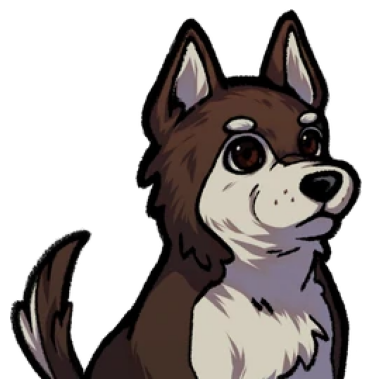

¡Guau! ("¿Qué me quieres preguntar?")pelaje
¡Guau Guau! ("Los Husky Siberianos son perros de pelaje doble y espeso diseñado para el clima frío. Nosotros somos perros de todos los colores, como negro, blanco, rojo y muchas más combinaciones")


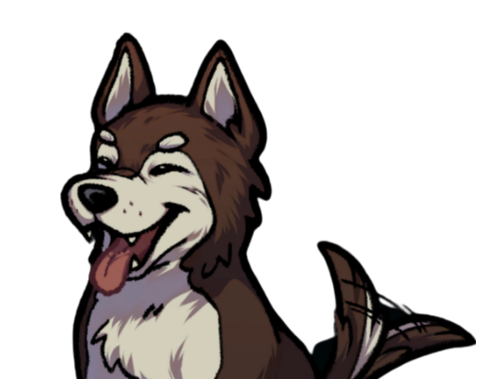

¡Guau! ("¿Qué más me quieres preguntar?")pelake
¡Guau Guau! ("¡Okay! Lo voy a repetir. Los Husky Siberianos son perros de pelaje doble y espeso diseñado para el clima frío. Nosotros somos perros de todos los colores, como negro, blanco, rojo y muchas más combinaciones")


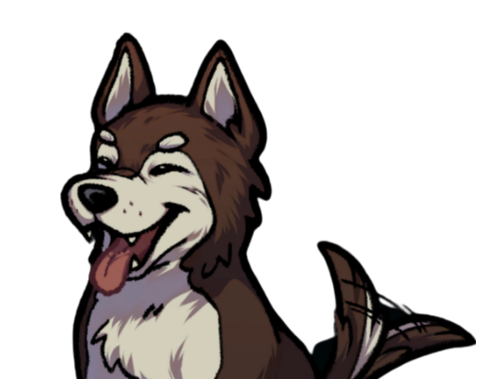

¡Guau! ("¿Qué más me quieres preguntar?")gracias
¡Guau Guau!


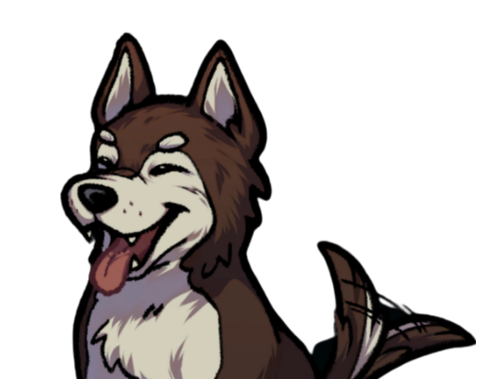

In [ ]:
import requests
import random
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display
from IPython.display import Audio


# This function will pass your text to the machine learning model
# and return the top result with the highest confidence
def classify(text):
    key = "18d1b5f0-e1e2-11ef-bfaa-c75c6f650b17dc14bd47-131c-4c05-a0a9-1dbeb3d2281a"

    url = "https://machinelearningforkids.co.uk/api/scratch/"+ key + "/classify"

    response = requests.get(url, params={ "data" : text })

    if response.ok:
        responseData = response.json()
        topMatch = responseData[0]
        return topMatch
    else:
        response.raise_for_status()

onomatopeyas = ["¡Wof Wof!", "¡Guau Guau!", "¡Warf Warf!", "¡Bork Bork!"]
# CHANGE THIS to something you want your machine learning model to classify
print("¡Wof! (\"Hola, soy Lupi. Un Husky Siberiano que está aquí para resolver cualquier duda que tengas sobre nosotros.\")")
display(Audio("Lupi_Ladrido.mp3", autoplay=True))
img = Image.open("Lupi_Curioso.png")
plt.imshow(img)
plt.axis("off")
plt.show()
plt.pause(1)

confidence = 0
label = ""
frasesdichas=[]
while confidence < 50 or label not in ["Buen_Perro", "Mal_Perro"]:
  if (len(frasesdichas)==0):
    demo = classify(input('¡Guau! ("¿Qué me quieres preguntar?")'))
  else:
    demo = classify(input("¡Guau! (\"¿Qué más me quieres preguntar?\")"))

  respuestas = {
      "Pelaje" : "Los Husky Siberianos son perros de pelaje doble y espeso diseñado para el clima frío. Nosotros somos perros de todos los colores, como negro, blanco, rojo y muchas más combinaciones",
      "Temperamento" : "Nosotros los Husky Siberianos somos perros muy famosos porque somos muy amistosos y extrovertidos. Somos inteligentes e independientes, aunque a veces un poquito traviesos. ¡Por como somos nos llevamos muy bien con otros perros y personas!",
      "Cuidados" : "¡Para cuidar a uno de nosotros ocuparas un buen cepillo! Nosotros mudamos pelaje muy seguido, y nos ayuda mucho un buen cepillado cada cierto tiempo para quitarnos el exceso de pelos. También nosotros amamos correr, las caminatas y tirar de trineos, ¡así que no te olvides de sacarnos a jugar!",
      "Dato_Curioso" : "¡Okay! Aquí va un dato curioso. ¿Sabias que los Husky Siberianos somos capaces de repetir sonidos? A nosotros nos gusta mucho hacer sonidos además de ladrar, y a veces hasta nos gusta copiarles a nuestros dueños. ¡Hay muchos Husky que pueden imitar hasta frases y decir te amo!",
      "Buen_Perro" : random.choice(onomatopeyas),
      "Mal_Perro" : "..."
  }

  label = demo["class_name"]
  confidence = demo["confidence"]


  # CHANGE THIS to do something different with the result
  if label in frasesdichas:
    print("%s (\"¡Okay! Lo voy a repetir. %s\")" % (random.choice(onomatopeyas), respuestas[label]))
  elif label != "Buen_Perro" and label != "Mal_Perro":
    print("%s (\"%s\")" % (random.choice(onomatopeyas), respuestas[label]))
    frasesdichas.append(label)
  else:
    print(respuestas[label])

  if label == "Mal_Perro":
    img = Image.open("Lupi_Triste.png")
    display(Audio("Lupi_Infeliz.mp3", autoplay=True))
  else:
    img = Image.open("Lupi_Feliz.png")
    display(Audio("Lupi_Feliz.mp3", autoplay=True))

  plt.imshow(img)
  plt.axis("off")
  plt.show()
  plt.pause(1)